In [2]:
%matplotlib inline
import os
import os.path
import cv2
import glob
import pickle
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.models import load_model

Using TensorFlow backend.


In [3]:
# Define folders names
INPUT_CAPTCHA_FOLDER = "generated_captcha_images"
OUTPUT_FOLDER = "extract_letter"

MODEL_FILENAME_CNN = "captcha_model_CNN.hdf5"
MODEL_FILENAME_MLP = "captcha_model_MLP.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"

In [4]:
captcha_files = glob.glob(os.path.join(INPUT_CAPTCHA_FOLDER, "*"))
counts = {}

for (i, captcha_image) in enumerate(captcha_files):
    print("[information]: Processing {}/{}".format(i + 1, len(captcha_files)))

    filename = os.path.basename(captcha_image)
    captcha_text = os.path.splitext(filename)[0]
    image = cv2.imread(captcha_image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Add some extra padding
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours the image
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[0] if imutils.is_cv2() else contours[1]

    each_letter_region = []

    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        if w / h > 1.25:
            half_width = int(w / 2)
            each_letter_region.append((x, y, half_width, h))
            each_letter_region.append((x + half_width, y, half_width, h))
        else:
            each_letter_region.append((x, y, w, h))
    if len(each_letter_region) != 4:
        continue

    each_letter_region = sorted(each_letter_region, key=lambda x: x[0])
    for bounding_box, letter_text in zip(each_letter_region, captcha_text):
        # Grab the coordinates of the letter in the image
        x, y, w, h = bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Get the folder to save the image
        save_path = os.path.join(OUTPUT_FOLDER, letter_text)

        # write the letter image to a file
        count = counts.get(letter_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)

        # increment the count for the current key
        counts[letter_text] = count + 1

[information]: Processing 1/9955
[information]: Processing 2/9955
[information]: Processing 3/9955
[information]: Processing 4/9955
[information]: Processing 5/9955
[information]: Processing 6/9955
[information]: Processing 7/9955
[information]: Processing 8/9955
[information]: Processing 9/9955
[information]: Processing 10/9955
[information]: Processing 11/9955
[information]: Processing 12/9955
[information]: Processing 13/9955
[information]: Processing 14/9955
[information]: Processing 15/9955
[information]: Processing 16/9955
[information]: Processing 17/9955
[information]: Processing 18/9955
[information]: Processing 19/9955
[information]: Processing 20/9955
[information]: Processing 21/9955
[information]: Processing 22/9955
[information]: Processing 23/9955
[information]: Processing 24/9955
[information]: Processing 25/9955
[information]: Processing 26/9955
[information]: Processing 27/9955
[information]: Processing 28/9955
[information]: Processing 29/9955
[information]: Processi

[information]: Processing 259/9955
[information]: Processing 260/9955
[information]: Processing 261/9955
[information]: Processing 262/9955
[information]: Processing 263/9955
[information]: Processing 264/9955
[information]: Processing 265/9955
[information]: Processing 266/9955
[information]: Processing 267/9955
[information]: Processing 268/9955
[information]: Processing 269/9955
[information]: Processing 270/9955
[information]: Processing 271/9955
[information]: Processing 272/9955
[information]: Processing 273/9955
[information]: Processing 274/9955
[information]: Processing 275/9955
[information]: Processing 276/9955
[information]: Processing 277/9955
[information]: Processing 278/9955
[information]: Processing 279/9955
[information]: Processing 280/9955
[information]: Processing 281/9955
[information]: Processing 282/9955
[information]: Processing 283/9955
[information]: Processing 284/9955
[information]: Processing 285/9955
[information]: Processing 286/9955
[information]: Proce

[information]: Processing 518/9955
[information]: Processing 519/9955
[information]: Processing 520/9955
[information]: Processing 521/9955
[information]: Processing 522/9955
[information]: Processing 523/9955
[information]: Processing 524/9955
[information]: Processing 525/9955
[information]: Processing 526/9955
[information]: Processing 527/9955
[information]: Processing 528/9955
[information]: Processing 529/9955
[information]: Processing 530/9955
[information]: Processing 531/9955
[information]: Processing 532/9955
[information]: Processing 533/9955
[information]: Processing 534/9955
[information]: Processing 535/9955
[information]: Processing 536/9955
[information]: Processing 537/9955
[information]: Processing 538/9955
[information]: Processing 539/9955
[information]: Processing 540/9955
[information]: Processing 541/9955
[information]: Processing 542/9955
[information]: Processing 543/9955
[information]: Processing 544/9955
[information]: Processing 545/9955
[information]: Proce

[information]: Processing 776/9955
[information]: Processing 777/9955
[information]: Processing 778/9955
[information]: Processing 779/9955
[information]: Processing 780/9955
[information]: Processing 781/9955
[information]: Processing 782/9955
[information]: Processing 783/9955
[information]: Processing 784/9955
[information]: Processing 785/9955
[information]: Processing 786/9955
[information]: Processing 787/9955
[information]: Processing 788/9955
[information]: Processing 789/9955
[information]: Processing 790/9955
[information]: Processing 791/9955
[information]: Processing 792/9955
[information]: Processing 793/9955
[information]: Processing 794/9955
[information]: Processing 795/9955
[information]: Processing 796/9955
[information]: Processing 797/9955
[information]: Processing 798/9955
[information]: Processing 799/9955
[information]: Processing 800/9955
[information]: Processing 801/9955
[information]: Processing 802/9955
[information]: Processing 803/9955
[information]: Proce

[information]: Processing 1023/9955
[information]: Processing 1024/9955
[information]: Processing 1025/9955
[information]: Processing 1026/9955
[information]: Processing 1027/9955
[information]: Processing 1028/9955
[information]: Processing 1029/9955
[information]: Processing 1030/9955
[information]: Processing 1031/9955
[information]: Processing 1032/9955
[information]: Processing 1033/9955
[information]: Processing 1034/9955
[information]: Processing 1035/9955
[information]: Processing 1036/9955
[information]: Processing 1037/9955
[information]: Processing 1038/9955
[information]: Processing 1039/9955
[information]: Processing 1040/9955
[information]: Processing 1041/9955
[information]: Processing 1042/9955
[information]: Processing 1043/9955
[information]: Processing 1044/9955
[information]: Processing 1045/9955
[information]: Processing 1046/9955
[information]: Processing 1047/9955
[information]: Processing 1048/9955
[information]: Processing 1049/9955
[information]: Processing 10

[information]: Processing 1255/9955
[information]: Processing 1256/9955
[information]: Processing 1257/9955
[information]: Processing 1258/9955
[information]: Processing 1259/9955
[information]: Processing 1260/9955
[information]: Processing 1261/9955
[information]: Processing 1262/9955
[information]: Processing 1263/9955
[information]: Processing 1264/9955
[information]: Processing 1265/9955
[information]: Processing 1266/9955
[information]: Processing 1267/9955
[information]: Processing 1268/9955
[information]: Processing 1269/9955
[information]: Processing 1270/9955
[information]: Processing 1271/9955
[information]: Processing 1272/9955
[information]: Processing 1273/9955
[information]: Processing 1274/9955
[information]: Processing 1275/9955
[information]: Processing 1276/9955
[information]: Processing 1277/9955
[information]: Processing 1278/9955
[information]: Processing 1279/9955
[information]: Processing 1280/9955
[information]: Processing 1281/9955
[information]: Processing 12

[information]: Processing 1502/9955
[information]: Processing 1503/9955
[information]: Processing 1504/9955
[information]: Processing 1505/9955
[information]: Processing 1506/9955
[information]: Processing 1507/9955
[information]: Processing 1508/9955
[information]: Processing 1509/9955
[information]: Processing 1510/9955
[information]: Processing 1511/9955
[information]: Processing 1512/9955
[information]: Processing 1513/9955
[information]: Processing 1514/9955
[information]: Processing 1515/9955
[information]: Processing 1516/9955
[information]: Processing 1517/9955
[information]: Processing 1518/9955
[information]: Processing 1519/9955
[information]: Processing 1520/9955
[information]: Processing 1521/9955
[information]: Processing 1522/9955
[information]: Processing 1523/9955
[information]: Processing 1524/9955
[information]: Processing 1525/9955
[information]: Processing 1526/9955
[information]: Processing 1527/9955
[information]: Processing 1528/9955
[information]: Processing 15

[information]: Processing 1733/9955
[information]: Processing 1734/9955
[information]: Processing 1735/9955
[information]: Processing 1736/9955
[information]: Processing 1737/9955
[information]: Processing 1738/9955
[information]: Processing 1739/9955
[information]: Processing 1740/9955
[information]: Processing 1741/9955
[information]: Processing 1742/9955
[information]: Processing 1743/9955
[information]: Processing 1744/9955
[information]: Processing 1745/9955
[information]: Processing 1746/9955
[information]: Processing 1747/9955
[information]: Processing 1748/9955
[information]: Processing 1749/9955
[information]: Processing 1750/9955
[information]: Processing 1751/9955
[information]: Processing 1752/9955
[information]: Processing 1753/9955
[information]: Processing 1754/9955
[information]: Processing 1755/9955
[information]: Processing 1756/9955
[information]: Processing 1757/9955
[information]: Processing 1758/9955
[information]: Processing 1759/9955
[information]: Processing 17

[information]: Processing 1968/9955
[information]: Processing 1969/9955
[information]: Processing 1970/9955
[information]: Processing 1971/9955
[information]: Processing 1972/9955
[information]: Processing 1973/9955
[information]: Processing 1974/9955
[information]: Processing 1975/9955
[information]: Processing 1976/9955
[information]: Processing 1977/9955
[information]: Processing 1978/9955
[information]: Processing 1979/9955
[information]: Processing 1980/9955
[information]: Processing 1981/9955
[information]: Processing 1982/9955
[information]: Processing 1983/9955
[information]: Processing 1984/9955
[information]: Processing 1985/9955
[information]: Processing 1986/9955
[information]: Processing 1987/9955
[information]: Processing 1988/9955
[information]: Processing 1989/9955
[information]: Processing 1990/9955
[information]: Processing 1991/9955
[information]: Processing 1992/9955
[information]: Processing 1993/9955
[information]: Processing 1994/9955
[information]: Processing 19

[information]: Processing 2200/9955
[information]: Processing 2201/9955
[information]: Processing 2202/9955
[information]: Processing 2203/9955
[information]: Processing 2204/9955
[information]: Processing 2205/9955
[information]: Processing 2206/9955
[information]: Processing 2207/9955
[information]: Processing 2208/9955
[information]: Processing 2209/9955
[information]: Processing 2210/9955
[information]: Processing 2211/9955
[information]: Processing 2212/9955
[information]: Processing 2213/9955
[information]: Processing 2214/9955
[information]: Processing 2215/9955
[information]: Processing 2216/9955
[information]: Processing 2217/9955
[information]: Processing 2218/9955
[information]: Processing 2219/9955
[information]: Processing 2220/9955
[information]: Processing 2221/9955
[information]: Processing 2222/9955
[information]: Processing 2223/9955
[information]: Processing 2224/9955
[information]: Processing 2225/9955
[information]: Processing 2226/9955
[information]: Processing 22

[information]: Processing 2429/9955
[information]: Processing 2430/9955
[information]: Processing 2431/9955
[information]: Processing 2432/9955
[information]: Processing 2433/9955
[information]: Processing 2434/9955
[information]: Processing 2435/9955
[information]: Processing 2436/9955
[information]: Processing 2437/9955
[information]: Processing 2438/9955
[information]: Processing 2439/9955
[information]: Processing 2440/9955
[information]: Processing 2441/9955
[information]: Processing 2442/9955
[information]: Processing 2443/9955
[information]: Processing 2444/9955
[information]: Processing 2445/9955
[information]: Processing 2446/9955
[information]: Processing 2447/9955
[information]: Processing 2448/9955
[information]: Processing 2449/9955
[information]: Processing 2450/9955
[information]: Processing 2451/9955
[information]: Processing 2452/9955
[information]: Processing 2453/9955
[information]: Processing 2454/9955
[information]: Processing 2455/9955
[information]: Processing 24

[information]: Processing 2669/9955
[information]: Processing 2670/9955
[information]: Processing 2671/9955
[information]: Processing 2672/9955
[information]: Processing 2673/9955
[information]: Processing 2674/9955
[information]: Processing 2675/9955
[information]: Processing 2676/9955
[information]: Processing 2677/9955
[information]: Processing 2678/9955
[information]: Processing 2679/9955
[information]: Processing 2680/9955
[information]: Processing 2681/9955
[information]: Processing 2682/9955
[information]: Processing 2683/9955
[information]: Processing 2684/9955
[information]: Processing 2685/9955
[information]: Processing 2686/9955
[information]: Processing 2687/9955
[information]: Processing 2688/9955
[information]: Processing 2689/9955
[information]: Processing 2690/9955
[information]: Processing 2691/9955
[information]: Processing 2692/9955
[information]: Processing 2693/9955
[information]: Processing 2694/9955
[information]: Processing 2695/9955
[information]: Processing 26

[information]: Processing 2903/9955
[information]: Processing 2904/9955
[information]: Processing 2905/9955
[information]: Processing 2906/9955
[information]: Processing 2907/9955
[information]: Processing 2908/9955
[information]: Processing 2909/9955
[information]: Processing 2910/9955
[information]: Processing 2911/9955
[information]: Processing 2912/9955
[information]: Processing 2913/9955
[information]: Processing 2914/9955
[information]: Processing 2915/9955
[information]: Processing 2916/9955
[information]: Processing 2917/9955
[information]: Processing 2918/9955
[information]: Processing 2919/9955
[information]: Processing 2920/9955
[information]: Processing 2921/9955
[information]: Processing 2922/9955
[information]: Processing 2923/9955
[information]: Processing 2924/9955
[information]: Processing 2925/9955
[information]: Processing 2926/9955
[information]: Processing 2927/9955
[information]: Processing 2928/9955
[information]: Processing 2929/9955
[information]: Processing 29

[information]: Processing 3145/9955
[information]: Processing 3146/9955
[information]: Processing 3147/9955
[information]: Processing 3148/9955
[information]: Processing 3149/9955
[information]: Processing 3150/9955
[information]: Processing 3151/9955
[information]: Processing 3152/9955
[information]: Processing 3153/9955
[information]: Processing 3154/9955
[information]: Processing 3155/9955
[information]: Processing 3156/9955
[information]: Processing 3157/9955
[information]: Processing 3158/9955
[information]: Processing 3159/9955
[information]: Processing 3160/9955
[information]: Processing 3161/9955
[information]: Processing 3162/9955
[information]: Processing 3163/9955
[information]: Processing 3164/9955
[information]: Processing 3165/9955
[information]: Processing 3166/9955
[information]: Processing 3167/9955
[information]: Processing 3168/9955
[information]: Processing 3169/9955
[information]: Processing 3170/9955
[information]: Processing 3171/9955
[information]: Processing 31

[information]: Processing 3392/9955
[information]: Processing 3393/9955
[information]: Processing 3394/9955
[information]: Processing 3395/9955
[information]: Processing 3396/9955
[information]: Processing 3397/9955
[information]: Processing 3398/9955
[information]: Processing 3399/9955
[information]: Processing 3400/9955
[information]: Processing 3401/9955
[information]: Processing 3402/9955
[information]: Processing 3403/9955
[information]: Processing 3404/9955
[information]: Processing 3405/9955
[information]: Processing 3406/9955
[information]: Processing 3407/9955
[information]: Processing 3408/9955
[information]: Processing 3409/9955
[information]: Processing 3410/9955
[information]: Processing 3411/9955
[information]: Processing 3412/9955
[information]: Processing 3413/9955
[information]: Processing 3414/9955
[information]: Processing 3415/9955
[information]: Processing 3416/9955
[information]: Processing 3417/9955
[information]: Processing 3418/9955
[information]: Processing 34

[information]: Processing 3631/9955
[information]: Processing 3632/9955
[information]: Processing 3633/9955
[information]: Processing 3634/9955
[information]: Processing 3635/9955
[information]: Processing 3636/9955
[information]: Processing 3637/9955
[information]: Processing 3638/9955
[information]: Processing 3639/9955
[information]: Processing 3640/9955
[information]: Processing 3641/9955
[information]: Processing 3642/9955
[information]: Processing 3643/9955
[information]: Processing 3644/9955
[information]: Processing 3645/9955
[information]: Processing 3646/9955
[information]: Processing 3647/9955
[information]: Processing 3648/9955
[information]: Processing 3649/9955
[information]: Processing 3650/9955
[information]: Processing 3651/9955
[information]: Processing 3652/9955
[information]: Processing 3653/9955
[information]: Processing 3654/9955
[information]: Processing 3655/9955
[information]: Processing 3656/9955
[information]: Processing 3657/9955
[information]: Processing 36

[information]: Processing 3859/9955
[information]: Processing 3860/9955
[information]: Processing 3861/9955
[information]: Processing 3862/9955
[information]: Processing 3863/9955
[information]: Processing 3864/9955
[information]: Processing 3865/9955
[information]: Processing 3866/9955
[information]: Processing 3867/9955
[information]: Processing 3868/9955
[information]: Processing 3869/9955
[information]: Processing 3870/9955
[information]: Processing 3871/9955
[information]: Processing 3872/9955
[information]: Processing 3873/9955
[information]: Processing 3874/9955
[information]: Processing 3875/9955
[information]: Processing 3876/9955
[information]: Processing 3877/9955
[information]: Processing 3878/9955
[information]: Processing 3879/9955
[information]: Processing 3880/9955
[information]: Processing 3881/9955
[information]: Processing 3882/9955
[information]: Processing 3883/9955
[information]: Processing 3884/9955
[information]: Processing 3885/9955
[information]: Processing 38

[information]: Processing 4094/9955
[information]: Processing 4095/9955
[information]: Processing 4096/9955
[information]: Processing 4097/9955
[information]: Processing 4098/9955
[information]: Processing 4099/9955
[information]: Processing 4100/9955
[information]: Processing 4101/9955
[information]: Processing 4102/9955
[information]: Processing 4103/9955
[information]: Processing 4104/9955
[information]: Processing 4105/9955
[information]: Processing 4106/9955
[information]: Processing 4107/9955
[information]: Processing 4108/9955
[information]: Processing 4109/9955
[information]: Processing 4110/9955
[information]: Processing 4111/9955
[information]: Processing 4112/9955
[information]: Processing 4113/9955
[information]: Processing 4114/9955
[information]: Processing 4115/9955
[information]: Processing 4116/9955
[information]: Processing 4117/9955
[information]: Processing 4118/9955
[information]: Processing 4119/9955
[information]: Processing 4120/9955
[information]: Processing 41

[information]: Processing 4351/9955
[information]: Processing 4352/9955
[information]: Processing 4353/9955
[information]: Processing 4354/9955
[information]: Processing 4355/9955
[information]: Processing 4356/9955
[information]: Processing 4357/9955
[information]: Processing 4358/9955
[information]: Processing 4359/9955
[information]: Processing 4360/9955
[information]: Processing 4361/9955
[information]: Processing 4362/9955
[information]: Processing 4363/9955
[information]: Processing 4364/9955
[information]: Processing 4365/9955
[information]: Processing 4366/9955
[information]: Processing 4367/9955
[information]: Processing 4368/9955
[information]: Processing 4369/9955
[information]: Processing 4370/9955
[information]: Processing 4371/9955
[information]: Processing 4372/9955
[information]: Processing 4373/9955
[information]: Processing 4374/9955
[information]: Processing 4375/9955
[information]: Processing 4376/9955
[information]: Processing 4377/9955
[information]: Processing 43

[information]: Processing 4583/9955
[information]: Processing 4584/9955
[information]: Processing 4585/9955
[information]: Processing 4586/9955
[information]: Processing 4587/9955
[information]: Processing 4588/9955
[information]: Processing 4589/9955
[information]: Processing 4590/9955
[information]: Processing 4591/9955
[information]: Processing 4592/9955
[information]: Processing 4593/9955
[information]: Processing 4594/9955
[information]: Processing 4595/9955
[information]: Processing 4596/9955
[information]: Processing 4597/9955
[information]: Processing 4598/9955
[information]: Processing 4599/9955
[information]: Processing 4600/9955
[information]: Processing 4601/9955
[information]: Processing 4602/9955
[information]: Processing 4603/9955
[information]: Processing 4604/9955
[information]: Processing 4605/9955
[information]: Processing 4606/9955
[information]: Processing 4607/9955
[information]: Processing 4608/9955
[information]: Processing 4609/9955
[information]: Processing 46

[information]: Processing 4813/9955
[information]: Processing 4814/9955
[information]: Processing 4815/9955
[information]: Processing 4816/9955
[information]: Processing 4817/9955
[information]: Processing 4818/9955
[information]: Processing 4819/9955
[information]: Processing 4820/9955
[information]: Processing 4821/9955
[information]: Processing 4822/9955
[information]: Processing 4823/9955
[information]: Processing 4824/9955
[information]: Processing 4825/9955
[information]: Processing 4826/9955
[information]: Processing 4827/9955
[information]: Processing 4828/9955
[information]: Processing 4829/9955
[information]: Processing 4830/9955
[information]: Processing 4831/9955
[information]: Processing 4832/9955
[information]: Processing 4833/9955
[information]: Processing 4834/9955
[information]: Processing 4835/9955
[information]: Processing 4836/9955
[information]: Processing 4837/9955
[information]: Processing 4838/9955
[information]: Processing 4839/9955
[information]: Processing 48

[information]: Processing 5047/9955
[information]: Processing 5048/9955
[information]: Processing 5049/9955
[information]: Processing 5050/9955
[information]: Processing 5051/9955
[information]: Processing 5052/9955
[information]: Processing 5053/9955
[information]: Processing 5054/9955
[information]: Processing 5055/9955
[information]: Processing 5056/9955
[information]: Processing 5057/9955
[information]: Processing 5058/9955
[information]: Processing 5059/9955
[information]: Processing 5060/9955
[information]: Processing 5061/9955
[information]: Processing 5062/9955
[information]: Processing 5063/9955
[information]: Processing 5064/9955
[information]: Processing 5065/9955
[information]: Processing 5066/9955
[information]: Processing 5067/9955
[information]: Processing 5068/9955
[information]: Processing 5069/9955
[information]: Processing 5070/9955
[information]: Processing 5071/9955
[information]: Processing 5072/9955
[information]: Processing 5073/9955
[information]: Processing 50

[information]: Processing 5279/9955
[information]: Processing 5280/9955
[information]: Processing 5281/9955
[information]: Processing 5282/9955
[information]: Processing 5283/9955
[information]: Processing 5284/9955
[information]: Processing 5285/9955
[information]: Processing 5286/9955
[information]: Processing 5287/9955
[information]: Processing 5288/9955
[information]: Processing 5289/9955
[information]: Processing 5290/9955
[information]: Processing 5291/9955
[information]: Processing 5292/9955
[information]: Processing 5293/9955
[information]: Processing 5294/9955
[information]: Processing 5295/9955
[information]: Processing 5296/9955
[information]: Processing 5297/9955
[information]: Processing 5298/9955
[information]: Processing 5299/9955
[information]: Processing 5300/9955
[information]: Processing 5301/9955
[information]: Processing 5302/9955
[information]: Processing 5303/9955
[information]: Processing 5304/9955
[information]: Processing 5305/9955
[information]: Processing 53

[information]: Processing 5509/9955
[information]: Processing 5510/9955
[information]: Processing 5511/9955
[information]: Processing 5512/9955
[information]: Processing 5513/9955
[information]: Processing 5514/9955
[information]: Processing 5515/9955
[information]: Processing 5516/9955
[information]: Processing 5517/9955
[information]: Processing 5518/9955
[information]: Processing 5519/9955
[information]: Processing 5520/9955
[information]: Processing 5521/9955
[information]: Processing 5522/9955
[information]: Processing 5523/9955
[information]: Processing 5524/9955
[information]: Processing 5525/9955
[information]: Processing 5526/9955
[information]: Processing 5527/9955
[information]: Processing 5528/9955
[information]: Processing 5529/9955
[information]: Processing 5530/9955
[information]: Processing 5531/9955
[information]: Processing 5532/9955
[information]: Processing 5533/9955
[information]: Processing 5534/9955
[information]: Processing 5535/9955
[information]: Processing 55

[information]: Processing 5737/9955
[information]: Processing 5738/9955
[information]: Processing 5739/9955
[information]: Processing 5740/9955
[information]: Processing 5741/9955
[information]: Processing 5742/9955
[information]: Processing 5743/9955
[information]: Processing 5744/9955
[information]: Processing 5745/9955
[information]: Processing 5746/9955
[information]: Processing 5747/9955
[information]: Processing 5748/9955
[information]: Processing 5749/9955
[information]: Processing 5750/9955
[information]: Processing 5751/9955
[information]: Processing 5752/9955
[information]: Processing 5753/9955
[information]: Processing 5754/9955
[information]: Processing 5755/9955
[information]: Processing 5756/9955
[information]: Processing 5757/9955
[information]: Processing 5758/9955
[information]: Processing 5759/9955
[information]: Processing 5760/9955
[information]: Processing 5761/9955
[information]: Processing 5762/9955
[information]: Processing 5763/9955
[information]: Processing 57

[information]: Processing 5967/9955
[information]: Processing 5968/9955
[information]: Processing 5969/9955
[information]: Processing 5970/9955
[information]: Processing 5971/9955
[information]: Processing 5972/9955
[information]: Processing 5973/9955
[information]: Processing 5974/9955
[information]: Processing 5975/9955
[information]: Processing 5976/9955
[information]: Processing 5977/9955
[information]: Processing 5978/9955
[information]: Processing 5979/9955
[information]: Processing 5980/9955
[information]: Processing 5981/9955
[information]: Processing 5982/9955
[information]: Processing 5983/9955
[information]: Processing 5984/9955
[information]: Processing 5985/9955
[information]: Processing 5986/9955
[information]: Processing 5987/9955
[information]: Processing 5988/9955
[information]: Processing 5989/9955
[information]: Processing 5990/9955
[information]: Processing 5991/9955
[information]: Processing 5992/9955
[information]: Processing 5993/9955
[information]: Processing 59

[information]: Processing 6204/9955
[information]: Processing 6205/9955
[information]: Processing 6206/9955
[information]: Processing 6207/9955
[information]: Processing 6208/9955
[information]: Processing 6209/9955
[information]: Processing 6210/9955
[information]: Processing 6211/9955
[information]: Processing 6212/9955
[information]: Processing 6213/9955
[information]: Processing 6214/9955
[information]: Processing 6215/9955
[information]: Processing 6216/9955
[information]: Processing 6217/9955
[information]: Processing 6218/9955
[information]: Processing 6219/9955
[information]: Processing 6220/9955
[information]: Processing 6221/9955
[information]: Processing 6222/9955
[information]: Processing 6223/9955
[information]: Processing 6224/9955
[information]: Processing 6225/9955
[information]: Processing 6226/9955
[information]: Processing 6227/9955
[information]: Processing 6228/9955
[information]: Processing 6229/9955
[information]: Processing 6230/9955
[information]: Processing 62

[information]: Processing 6437/9955
[information]: Processing 6438/9955
[information]: Processing 6439/9955
[information]: Processing 6440/9955
[information]: Processing 6441/9955
[information]: Processing 6442/9955
[information]: Processing 6443/9955
[information]: Processing 6444/9955
[information]: Processing 6445/9955
[information]: Processing 6446/9955
[information]: Processing 6447/9955
[information]: Processing 6448/9955
[information]: Processing 6449/9955
[information]: Processing 6450/9955
[information]: Processing 6451/9955
[information]: Processing 6452/9955
[information]: Processing 6453/9955
[information]: Processing 6454/9955
[information]: Processing 6455/9955
[information]: Processing 6456/9955
[information]: Processing 6457/9955
[information]: Processing 6458/9955
[information]: Processing 6459/9955
[information]: Processing 6460/9955
[information]: Processing 6461/9955
[information]: Processing 6462/9955
[information]: Processing 6463/9955
[information]: Processing 64

[information]: Processing 6667/9955
[information]: Processing 6668/9955
[information]: Processing 6669/9955
[information]: Processing 6670/9955
[information]: Processing 6671/9955
[information]: Processing 6672/9955
[information]: Processing 6673/9955
[information]: Processing 6674/9955
[information]: Processing 6675/9955
[information]: Processing 6676/9955
[information]: Processing 6677/9955
[information]: Processing 6678/9955
[information]: Processing 6679/9955
[information]: Processing 6680/9955
[information]: Processing 6681/9955
[information]: Processing 6682/9955
[information]: Processing 6683/9955
[information]: Processing 6684/9955
[information]: Processing 6685/9955
[information]: Processing 6686/9955
[information]: Processing 6687/9955
[information]: Processing 6688/9955
[information]: Processing 6689/9955
[information]: Processing 6690/9955
[information]: Processing 6691/9955
[information]: Processing 6692/9955
[information]: Processing 6693/9955
[information]: Processing 66

[information]: Processing 6901/9955
[information]: Processing 6902/9955
[information]: Processing 6903/9955
[information]: Processing 6904/9955
[information]: Processing 6905/9955
[information]: Processing 6906/9955
[information]: Processing 6907/9955
[information]: Processing 6908/9955
[information]: Processing 6909/9955
[information]: Processing 6910/9955
[information]: Processing 6911/9955
[information]: Processing 6912/9955
[information]: Processing 6913/9955
[information]: Processing 6914/9955
[information]: Processing 6915/9955
[information]: Processing 6916/9955
[information]: Processing 6917/9955
[information]: Processing 6918/9955
[information]: Processing 6919/9955
[information]: Processing 6920/9955
[information]: Processing 6921/9955
[information]: Processing 6922/9955
[information]: Processing 6923/9955
[information]: Processing 6924/9955
[information]: Processing 6925/9955
[information]: Processing 6926/9955
[information]: Processing 6927/9955
[information]: Processing 69

[information]: Processing 7151/9955
[information]: Processing 7152/9955
[information]: Processing 7153/9955
[information]: Processing 7154/9955
[information]: Processing 7155/9955
[information]: Processing 7156/9955
[information]: Processing 7157/9955
[information]: Processing 7158/9955
[information]: Processing 7159/9955
[information]: Processing 7160/9955
[information]: Processing 7161/9955
[information]: Processing 7162/9955
[information]: Processing 7163/9955
[information]: Processing 7164/9955
[information]: Processing 7165/9955
[information]: Processing 7166/9955
[information]: Processing 7167/9955
[information]: Processing 7168/9955
[information]: Processing 7169/9955
[information]: Processing 7170/9955
[information]: Processing 7171/9955
[information]: Processing 7172/9955
[information]: Processing 7173/9955
[information]: Processing 7174/9955
[information]: Processing 7175/9955
[information]: Processing 7176/9955
[information]: Processing 7177/9955
[information]: Processing 71

[information]: Processing 7392/9955
[information]: Processing 7393/9955
[information]: Processing 7394/9955
[information]: Processing 7395/9955
[information]: Processing 7396/9955
[information]: Processing 7397/9955
[information]: Processing 7398/9955
[information]: Processing 7399/9955
[information]: Processing 7400/9955
[information]: Processing 7401/9955
[information]: Processing 7402/9955
[information]: Processing 7403/9955
[information]: Processing 7404/9955
[information]: Processing 7405/9955
[information]: Processing 7406/9955
[information]: Processing 7407/9955
[information]: Processing 7408/9955
[information]: Processing 7409/9955
[information]: Processing 7410/9955
[information]: Processing 7411/9955
[information]: Processing 7412/9955
[information]: Processing 7413/9955
[information]: Processing 7414/9955
[information]: Processing 7415/9955
[information]: Processing 7416/9955
[information]: Processing 7417/9955
[information]: Processing 7418/9955
[information]: Processing 74

[information]: Processing 7631/9955
[information]: Processing 7632/9955
[information]: Processing 7633/9955
[information]: Processing 7634/9955
[information]: Processing 7635/9955
[information]: Processing 7636/9955
[information]: Processing 7637/9955
[information]: Processing 7638/9955
[information]: Processing 7639/9955
[information]: Processing 7640/9955
[information]: Processing 7641/9955
[information]: Processing 7642/9955
[information]: Processing 7643/9955
[information]: Processing 7644/9955
[information]: Processing 7645/9955
[information]: Processing 7646/9955
[information]: Processing 7647/9955
[information]: Processing 7648/9955
[information]: Processing 7649/9955
[information]: Processing 7650/9955
[information]: Processing 7651/9955
[information]: Processing 7652/9955
[information]: Processing 7653/9955
[information]: Processing 7654/9955
[information]: Processing 7655/9955
[information]: Processing 7656/9955
[information]: Processing 7657/9955
[information]: Processing 76

[information]: Processing 7868/9955
[information]: Processing 7869/9955
[information]: Processing 7870/9955
[information]: Processing 7871/9955
[information]: Processing 7872/9955
[information]: Processing 7873/9955
[information]: Processing 7874/9955
[information]: Processing 7875/9955
[information]: Processing 7876/9955
[information]: Processing 7877/9955
[information]: Processing 7878/9955
[information]: Processing 7879/9955
[information]: Processing 7880/9955
[information]: Processing 7881/9955
[information]: Processing 7882/9955
[information]: Processing 7883/9955
[information]: Processing 7884/9955
[information]: Processing 7885/9955
[information]: Processing 7886/9955
[information]: Processing 7887/9955
[information]: Processing 7888/9955
[information]: Processing 7889/9955
[information]: Processing 7890/9955
[information]: Processing 7891/9955
[information]: Processing 7892/9955
[information]: Processing 7893/9955
[information]: Processing 7894/9955
[information]: Processing 78

[information]: Processing 8109/9955
[information]: Processing 8110/9955
[information]: Processing 8111/9955
[information]: Processing 8112/9955
[information]: Processing 8113/9955
[information]: Processing 8114/9955
[information]: Processing 8115/9955
[information]: Processing 8116/9955
[information]: Processing 8117/9955
[information]: Processing 8118/9955
[information]: Processing 8119/9955
[information]: Processing 8120/9955
[information]: Processing 8121/9955
[information]: Processing 8122/9955
[information]: Processing 8123/9955
[information]: Processing 8124/9955
[information]: Processing 8125/9955
[information]: Processing 8126/9955
[information]: Processing 8127/9955
[information]: Processing 8128/9955
[information]: Processing 8129/9955
[information]: Processing 8130/9955
[information]: Processing 8131/9955
[information]: Processing 8132/9955
[information]: Processing 8133/9955
[information]: Processing 8134/9955
[information]: Processing 8135/9955
[information]: Processing 81

[information]: Processing 8354/9955
[information]: Processing 8355/9955
[information]: Processing 8356/9955
[information]: Processing 8357/9955
[information]: Processing 8358/9955
[information]: Processing 8359/9955
[information]: Processing 8360/9955
[information]: Processing 8361/9955
[information]: Processing 8362/9955
[information]: Processing 8363/9955
[information]: Processing 8364/9955
[information]: Processing 8365/9955
[information]: Processing 8366/9955
[information]: Processing 8367/9955
[information]: Processing 8368/9955
[information]: Processing 8369/9955
[information]: Processing 8370/9955
[information]: Processing 8371/9955
[information]: Processing 8372/9955
[information]: Processing 8373/9955
[information]: Processing 8374/9955
[information]: Processing 8375/9955
[information]: Processing 8376/9955
[information]: Processing 8377/9955
[information]: Processing 8378/9955
[information]: Processing 8379/9955
[information]: Processing 8380/9955
[information]: Processing 83

[information]: Processing 8586/9955
[information]: Processing 8587/9955
[information]: Processing 8588/9955
[information]: Processing 8589/9955
[information]: Processing 8590/9955
[information]: Processing 8591/9955
[information]: Processing 8592/9955
[information]: Processing 8593/9955
[information]: Processing 8594/9955
[information]: Processing 8595/9955
[information]: Processing 8596/9955
[information]: Processing 8597/9955
[information]: Processing 8598/9955
[information]: Processing 8599/9955
[information]: Processing 8600/9955
[information]: Processing 8601/9955
[information]: Processing 8602/9955
[information]: Processing 8603/9955
[information]: Processing 8604/9955
[information]: Processing 8605/9955
[information]: Processing 8606/9955
[information]: Processing 8607/9955
[information]: Processing 8608/9955
[information]: Processing 8609/9955
[information]: Processing 8610/9955
[information]: Processing 8611/9955
[information]: Processing 8612/9955
[information]: Processing 86

[information]: Processing 8819/9955
[information]: Processing 8820/9955
[information]: Processing 8821/9955
[information]: Processing 8822/9955
[information]: Processing 8823/9955
[information]: Processing 8824/9955
[information]: Processing 8825/9955
[information]: Processing 8826/9955
[information]: Processing 8827/9955
[information]: Processing 8828/9955
[information]: Processing 8829/9955
[information]: Processing 8830/9955
[information]: Processing 8831/9955
[information]: Processing 8832/9955
[information]: Processing 8833/9955
[information]: Processing 8834/9955
[information]: Processing 8835/9955
[information]: Processing 8836/9955
[information]: Processing 8837/9955
[information]: Processing 8838/9955
[information]: Processing 8839/9955
[information]: Processing 8840/9955
[information]: Processing 8841/9955
[information]: Processing 8842/9955
[information]: Processing 8843/9955
[information]: Processing 8844/9955
[information]: Processing 8845/9955
[information]: Processing 88

[information]: Processing 9053/9955
[information]: Processing 9054/9955
[information]: Processing 9055/9955
[information]: Processing 9056/9955
[information]: Processing 9057/9955
[information]: Processing 9058/9955
[information]: Processing 9059/9955
[information]: Processing 9060/9955
[information]: Processing 9061/9955
[information]: Processing 9062/9955
[information]: Processing 9063/9955
[information]: Processing 9064/9955
[information]: Processing 9065/9955
[information]: Processing 9066/9955
[information]: Processing 9067/9955
[information]: Processing 9068/9955
[information]: Processing 9069/9955
[information]: Processing 9070/9955
[information]: Processing 9071/9955
[information]: Processing 9072/9955
[information]: Processing 9073/9955
[information]: Processing 9074/9955
[information]: Processing 9075/9955
[information]: Processing 9076/9955
[information]: Processing 9077/9955
[information]: Processing 9078/9955
[information]: Processing 9079/9955
[information]: Processing 90

[information]: Processing 9298/9955
[information]: Processing 9299/9955
[information]: Processing 9300/9955
[information]: Processing 9301/9955
[information]: Processing 9302/9955
[information]: Processing 9303/9955
[information]: Processing 9304/9955
[information]: Processing 9305/9955
[information]: Processing 9306/9955
[information]: Processing 9307/9955
[information]: Processing 9308/9955
[information]: Processing 9309/9955
[information]: Processing 9310/9955
[information]: Processing 9311/9955
[information]: Processing 9312/9955
[information]: Processing 9313/9955
[information]: Processing 9314/9955
[information]: Processing 9315/9955
[information]: Processing 9316/9955
[information]: Processing 9317/9955
[information]: Processing 9318/9955
[information]: Processing 9319/9955
[information]: Processing 9320/9955
[information]: Processing 9321/9955
[information]: Processing 9322/9955
[information]: Processing 9323/9955
[information]: Processing 9324/9955
[information]: Processing 93

[information]: Processing 9537/9955
[information]: Processing 9538/9955
[information]: Processing 9539/9955
[information]: Processing 9540/9955
[information]: Processing 9541/9955
[information]: Processing 9542/9955
[information]: Processing 9543/9955
[information]: Processing 9544/9955
[information]: Processing 9545/9955
[information]: Processing 9546/9955
[information]: Processing 9547/9955
[information]: Processing 9548/9955
[information]: Processing 9549/9955
[information]: Processing 9550/9955
[information]: Processing 9551/9955
[information]: Processing 9552/9955
[information]: Processing 9553/9955
[information]: Processing 9554/9955
[information]: Processing 9555/9955
[information]: Processing 9556/9955
[information]: Processing 9557/9955
[information]: Processing 9558/9955
[information]: Processing 9559/9955
[information]: Processing 9560/9955
[information]: Processing 9561/9955
[information]: Processing 9562/9955
[information]: Processing 9563/9955
[information]: Processing 95

[information]: Processing 9776/9955
[information]: Processing 9777/9955
[information]: Processing 9778/9955
[information]: Processing 9779/9955
[information]: Processing 9780/9955
[information]: Processing 9781/9955
[information]: Processing 9782/9955
[information]: Processing 9783/9955
[information]: Processing 9784/9955
[information]: Processing 9785/9955
[information]: Processing 9786/9955
[information]: Processing 9787/9955
[information]: Processing 9788/9955
[information]: Processing 9789/9955
[information]: Processing 9790/9955
[information]: Processing 9791/9955
[information]: Processing 9792/9955
[information]: Processing 9793/9955
[information]: Processing 9794/9955
[information]: Processing 9795/9955
[information]: Processing 9796/9955
[information]: Processing 9797/9955
[information]: Processing 9798/9955
[information]: Processing 9799/9955
[information]: Processing 9800/9955
[information]: Processing 9801/9955
[information]: Processing 9802/9955
[information]: Processing 98

### Data Visualization

In [1]:
number = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'0':0}
letter = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,
          'L':0,'M':0,'N':0,'O':0,'P':0,'Q':0,'R':0,'S':0,'T':0,'U':0,'V':0,
          'W':0,'X':0,'Y':0,'Z':0}
chlist = ['A','B','C','D','E','F','G','H','I','J','K','L','M',
           'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [3]:
# from the name of files to count how many the letters at each type.
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
%matplotlib inline
captcha_files = glob.glob(os.path.join("generated_captcha_images", "*"))
for (i, captcha_image) in enumerate(captcha_files):
    #print("[information]: Processing {}/{}".format(i + 1, len(captcha_files)))

    filename = os.path.basename(captcha_image)
    captcha_text = os.path.splitext(filename)[0]
    for i in range(4):
        #print (captcha_text[i])
        for num in range(10):
            if captcha_text[i] == str(num):
                number[str(num)] += 1
        for j in range(26):
            if captcha_text[i] == chlist[j]:
                letter[chlist[j]] += 1
#display(number,letter)

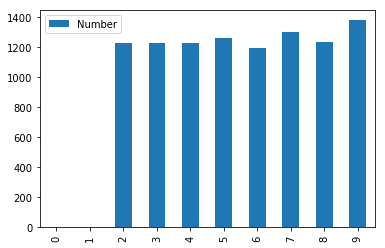

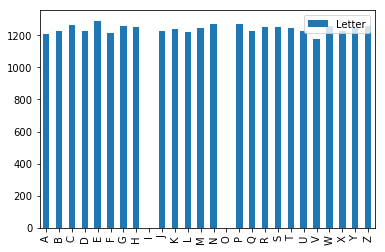

In [4]:
letter_s = pd.Series(letter,name='Letter')
letter_df = pd.DataFrame(letter_s)

number_s = pd.Series(number,name='Number')
number_df = pd.DataFrame(number_s)

number_df.plot(kind='bar',colormap='tab10')
letter_df.plot(kind='bar',colormap='tab10')

### Data Preprocessing

In [5]:
# Rsize images to fit 
def resize_image(image, width, height):

    (h, w) = image.shape[:2]
    if w > h:
        image = imutils.resize(image, width=width)
    else:
        image = imutils.resize(image, height=height)

    pad_w = int((width - image.shape[1]) / 2.0)
    pad_h = int((height - image.shape[0]) / 2.0)

    image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))
    return image

In [6]:
each_letter_region = []
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    # print (x,y,w,h)
    # Compare the ratio of width and height 
    if w / h > 1.25:
        # This contour is too wide to be a single letter
        half_w = int(w / 2)
        each_letter_region.append((x, y, half_w, h))
        each_letter_region.append((x + half_w, y, half_w, h))
    else:
        # This is a single letter
        each_letter_region.append((x, y, w, h))
each_letter_regions = sorted(each_letter_region, key=lambda x: x[0])

In [ ]:
# initialize the data and labels
data = []
labels = []

# loop over the input images
for file in paths.list_images(OUTPUT_FOLDER):
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = resize_image(image, 25, 25)
    image = np.expand_dims(image, axis=2)
    label = file.split(os.path.sep)[-2]
    data.append(image)
    labels.append(label)
# scaling
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)
# Label binary
lbr = LabelBinarizer().fit(y_train)
y_train = lbr.transform(y_train)
y_test = lbr.transform(y_test)


### CNN and MLP

In [11]:
models = []
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lbr, f)

# Build CNN
inpC = Input(shape=(25,25,1))
conv1 = Conv2D(20, (5, 5), padding="same", activation="relu")(inpC)
maxpool1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv1)
conv2 = Conv2D(50,(5,5),padding="same", activation="relu")(maxpool1)
maxpool2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)
flat = Flatten()(maxpool2)
dense1 = Dense(500, activation="relu")(flat)
dense2 = Dense(32, activation="softmax")(dense1)
model = Model(inpC,dense2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 25, 25, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               900500    
__________

In [12]:
# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the CNN
CNN = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=5, verbose=1)
# Save the CNN
models.append(model.save(MODEL_FILENAME_CNN))

Train on 29058 samples, validate on 9686 samples
Epoch 1/5
29058/29058 [==============================] - 179s - loss: 0.2119 - acc: 0.9499 - val_loss: 0.0233 - val_acc: 0.9946
Epoch 2/5
29058/29058 [==============================] - 233s - loss: 0.0162 - acc: 0.9958 - val_loss: 0.0121 - val_acc: 0.9968
Epoch 3/5
29058/29058 [==============================] - 206s - loss: 0.0062 - acc: 0.9981 - val_loss: 0.0110 - val_acc: 0.9968
Epoch 4/5
29058/29058 [==============================] - 200s - loss: 0.0040 - acc: 0.9989 - val_loss: 0.0071 - val_acc: 0.9980
Epoch 5/5
29058/29058 [==============================] - 204s - loss: 0.0073 - acc: 0.9980 - val_loss: 0.0104 - val_acc: 0.9970


In [13]:
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lbr, f)
    
# Build MLP
inp = Input(shape=(25,25,1))
flat = Flatten()(inp)
Dense1 = Dense(1000, activation='relu')(flat)
Drop1 = Dropout(0.2)(Dense1)
Dense2 = Dense(512, activation='relu')(Drop1)
Drop2 = Dropout(0.2)(Dense2)
Dense3 = Dense(32, activation='softmax')(Drop2)      
model1 = Model(inp,Dense3)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 25, 25, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 625)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              626000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                16416     
Total para

In [65]:
# Cmpile MLP
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['mae', 'acc'])
# Train the MLP
MLP = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10, verbose=1)
# Save the MLP
models.append(model1.save(MODEL_FILENAME_MLP))

Train on 29058 samples, validate on 9686 samples
Epoch 1/10
29058/29058 [==============================] - 63s - loss: 0.0623 - mean_absolute_error: 0.0015 - acc: 0.9815 - val_loss: 0.0300 - val_mean_absolute_error: 5.9461e-04 - val_acc: 0.9915
Epoch 2/10
29058/29058 [==============================] - 63s - loss: 0.0533 - mean_absolute_error: 0.0014 - acc: 0.9837 - val_loss: 0.0366 - val_mean_absolute_error: 7.4060e-04 - val_acc: 0.9903
Epoch 3/10
29058/29058 [==============================] - 60s - loss: 0.0603 - mean_absolute_error: 0.0015 - acc: 0.9818 - val_loss: 0.0294 - val_mean_absolute_error: 6.2748e-04 - val_acc: 0.9923
Epoch 4/10
29058/29058 [==============================] - 63s - loss: 0.0501 - mean_absolute_error: 0.0013 - acc: 0.9856 - val_loss: 0.0368 - val_mean_absolute_error: 8.9943e-04 - val_acc: 0.9885
Epoch 5/10
29058/29058 [==============================] - 58s - loss: 0.0406 - mean_absolute_error: 0.0010 - acc: 0.9870 - val_loss: 0.0339 - val_mean_absolute_error: 

In [66]:
print (MLP.history["acc"])
print (CNN.history["acc"])


[0.98151971918232506, 0.98368779682015284, 0.98176061669763925, 0.98558056301190722, 0.9869915341730332, 0.98575263266570312, 0.98540849335811131, 0.9874733292036616, 0.986750636657719, 0.98909078394934269]
[0.94985890288388741, 0.99580150044738114, 0.99814164773900471, 0.99886434028494731, 0.99803840594672721]


In [67]:
display(
MLP.history.items(),
CNN.history.items()
)

dict_items([('mean_absolute_error', [0.0015324615266031647, 0.0013831936916303281, 0.0015437898187572025, 0.0012509087498657741, 0.0010476291213747102, 0.0011440911069587516, 0.001192992741139823, 0.0010037087740392843, 0.001035600532687523, 0.00086680097904877666]), ('val_loss', [0.029984780951286514, 0.036555733982212894, 0.029424629658555145, 0.036750091136589946, 0.033850320682853409, 0.022302521657963016, 0.027908950251140915, 0.030856986735575166, 0.02953180827944802, 0.022993573611691309]), ('val_acc', [0.99153417303324387, 0.99029527152591368, 0.99225686557918646, 0.988540161057196, 0.99132768944868888, 0.99370225067107165, 0.99246334916374146, 0.99246334916374146, 0.99174065661779887, 0.99432170142473675]), ('acc', [0.98151971918232506, 0.98368779682015284, 0.98176061669763925, 0.98558056301190722, 0.9869915341730332, 0.98575263266570312, 0.98540849335811131, 0.9874733292036616, 0.986750636657719, 0.98909078394934269]), ('loss', [0.062270707216189637, 0.053252041692209977, 0.0

dict_items([('val_acc', [0.99463142680156924, 0.99679950443939702, 0.99679950443939702, 0.99803840594672721, 0.99700598802395213]), ('val_loss', [0.023280620480578561, 0.012062928976411095, 0.011037249554004119, 0.0071297766501406375, 0.010375856901594779]), ('acc', [0.94985890288388741, 0.99580150044738114, 0.99814164773900471, 0.99886434028494731, 0.99803840594672721]), ('loss', [0.21185403873562855, 0.016230029650090523, 0.0062253423304494959, 0.0040439116889198897, 0.0073078119224918069])])

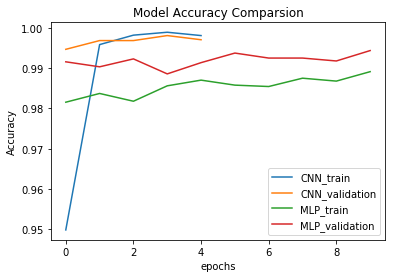

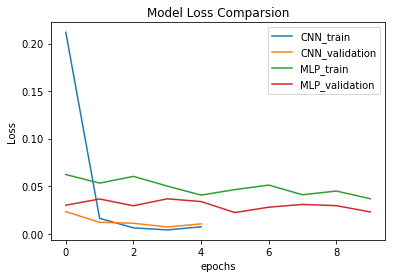

In [68]:
#  "Accuracy"
plt.plot(CNN.history['acc'])
plt.plot(CNN.history['val_acc'])
plt.plot(MLP.history['acc'])
plt.plot(MLP.history['val_acc'])

plt.title('Model Accuracy Comparsion')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['CNN_train', 'CNN_validation',
            'MLP_train', 'MLP_validation'], loc='lower right')
plt.savefig("acc.png",dpi=100)
plt.show()

# "Loss"
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.plot(MLP.history['loss'])
plt.plot(MLP.history['val_loss'])

plt.title('Model Loss Comparsion')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['CNN_train', 'CNN_validation',
            'MLP_train', 'MLP_validation'], loc='upper right')
plt.savefig("loss.png",dpi=100)
plt.show()

In [ ]:
### Use samples to test the model(CNN and MLP)

import pickle
MODEL_LABELS_FILENAME = "model_labels.dat"
CAPTCHA_IMAGE_FOLDER = "test_images"

with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

model_CNN = load_model(MODEL_FILENAME_CNN)
model_MLP = load_model(MODEL_FILENAME_MLP)

captcha_image_files = list(paths.list_images(CAPTCHA_IMAGE_FOLDER))
captcha_image_files = np.random.choice(captcha_image_files, size=(20,), replace=False)

# loop over the image paths
for image_file in captcha_image_files:
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.copyMakeBorder(image, 25, 25, 25, 25, cv2.BORDER_REPLICATE)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if imutils.is_cv2() else contours[1]

    each_letter_region = []

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if w / h > 1.25:          
            half_w = int(w / 2)
            each_letter_region.append((x, y, half_w, h))
            each_letter_region.append((x + half_w, y, half_w, h))
        else:
            each_letter_region.append((x, y, w, h))
    if len(each_letter_region) != 4:
        continue
        
    each_letter_region = sorted(each_letter_region, key=lambda x: x[0])

    output_cnn= cv2.merge([image] * 3)
    output_mlp = cv2.merge([image] * 3)
    preds_cnn = []
    preds_mlp = []

    # loop over the letters
    for letter_box in each_letter_region:
        x, y, w, h = letter_box
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]

        letter_image = resize_image(letter_image, 25, 25)

        letter_image = np.expand_dims(letter_image, axis=2)
        letter_image = np.expand_dims(letter_image, axis=0)

        pred_cnn = model_CNN.predict(letter_image)
        pred_mlp = model_MLP.predict(letter_image)

        
        letter_cnn = lbr.inverse_transform(pred_cnn)[0]
        preds_cnn.append(letter_cnn)
        
        letter_mlp = lbr.inverse_transform(pred_mlp)[0]
        preds_mlp.append(letter_mlp)

        
        cv2.rectangle(output_cnn, (x - 5, y - 5), (x + w , y + h), (10, 100, 50), 1)
        cv2.putText(output_cnn, letter_cnn, (x , y - 8), cv2.FONT_HERSHEY_DUPLEX, 0.50, (10, 100, 50), 2)
        
        cv2.rectangle(output_mlp, (x - 5, y - 5), (x + w , y + h), (10, 100, 50), 1)
        cv2.putText(output_mlp, letter_mlp, (x , y - 8), cv2.FONT_HERSHEY_DUPLEX, 0.50, (10, 100, 50), 2)

    
    captcha_text = "".join(preds_cnn)
    captcha_text = "".join(preds_mlp)
    print("CAPTCHA text is: {}".format(captcha_text))

    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', np.hstack([output_cnn,output_mlp]))   
    
    cv2.waitKey()

CAPTCHA text is: UQJG
CAPTCHA text is: E4S5
CAPTCHA text is: UNUS
CAPTCHA text is: 2HS6
CAPTCHA text is: UKSQ
CAPTCHA text is: UNBP
CAPTCHA text is: TY4L
CAPTCHA text is: 2E63
CAPTCHA text is: UR7G
CAPTCHA text is: E4N7
CAPTCHA text is: UMP7
CAPTCHA text is: 2SPF
CAPTCHA text is: U4S4
CAPTCHA text is: U99T
CAPTCHA text is: E4DK
CAPTCHA text is: UEWN
